In [78]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
# Load the dataset
url = "https://github.com/taylorduncan/DSC530/raw/main/Most%20Streamed%20Spotify%20Songs%202024.csv"

try:
    df = pd.read_csv(url, encoding='ISO-8859-1')  
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    
# Display the first few rows of the dataset
df.head()

# Display the dataset columns and basic statistics
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
count,4600,4600,4595,4600,4600,4600,4600.000000,4487,4530,4528,...,2477,3679.000000,3672,3545.000000,3494,3332,1267,4023,0.0,4600.000000
unique,4370,4005,1999,1562,4598,4577,NaN,4425,4207,4478,...,689,NaN,3558,NaN,3491,2975,1265,4002,NaN,NaN
top,Danza Kuduro - Cover,Un Verano Sin Ti,Drake,1/1/2012,USWL11700269,"3,441",NaN,"1,655,575,417",1,3,...,1,NaN,"1,097",NaN,"56,972,562",9,27,1,NaN,NaN
freq,13,20,63,38,2,2,NaN,4,46,8,...,54,NaN,17,NaN,2,6,2,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.844043,NaN,NaN,NaN,...,NaN,32.310954,NaN,25.348942,NaN,NaN,NaN,NaN,NaN,0.358913
std,NaN,NaN,NaN,NaN,NaN,NaN,38.543766,NaN,NaN,NaN,...,NaN,54.274538,NaN,25.989826,NaN,NaN,NaN,NaN,NaN,0.479734
min,NaN,NaN,NaN,NaN,NaN,NaN,19.400000,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,23.300000,NaN,NaN,NaN,...,NaN,5.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.900000,NaN,NaN,NaN,...,NaN,15.000000,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,44.425000,NaN,NaN,NaN,...,NaN,37.000000,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [ ]:
'''
Describe these variables:
The dataset contains the following variables:
1.	Track Score: Likely a numerical value indicating the overall score or ranking of the track based on certain criteria (e.g., popularity, user ratings).
2.	Spotify Popularity: A numerical score representing how popular the track is on Spotify, possibly on a scale from 0 to 100.
3.	Apple Music Playlist Count: The number of playlists that feature the track on Apple Music.
4.	Deezer Playlist Count: The number of playlists that feature the track on Deezer.
5.	Amazon Playlist Count: The number of playlists that feature the track on Amazon Music.
6.	TIDAL Popularity: A numerical score representing the track’s popularity on TIDAL, similar to Spotify Popularity.

'''

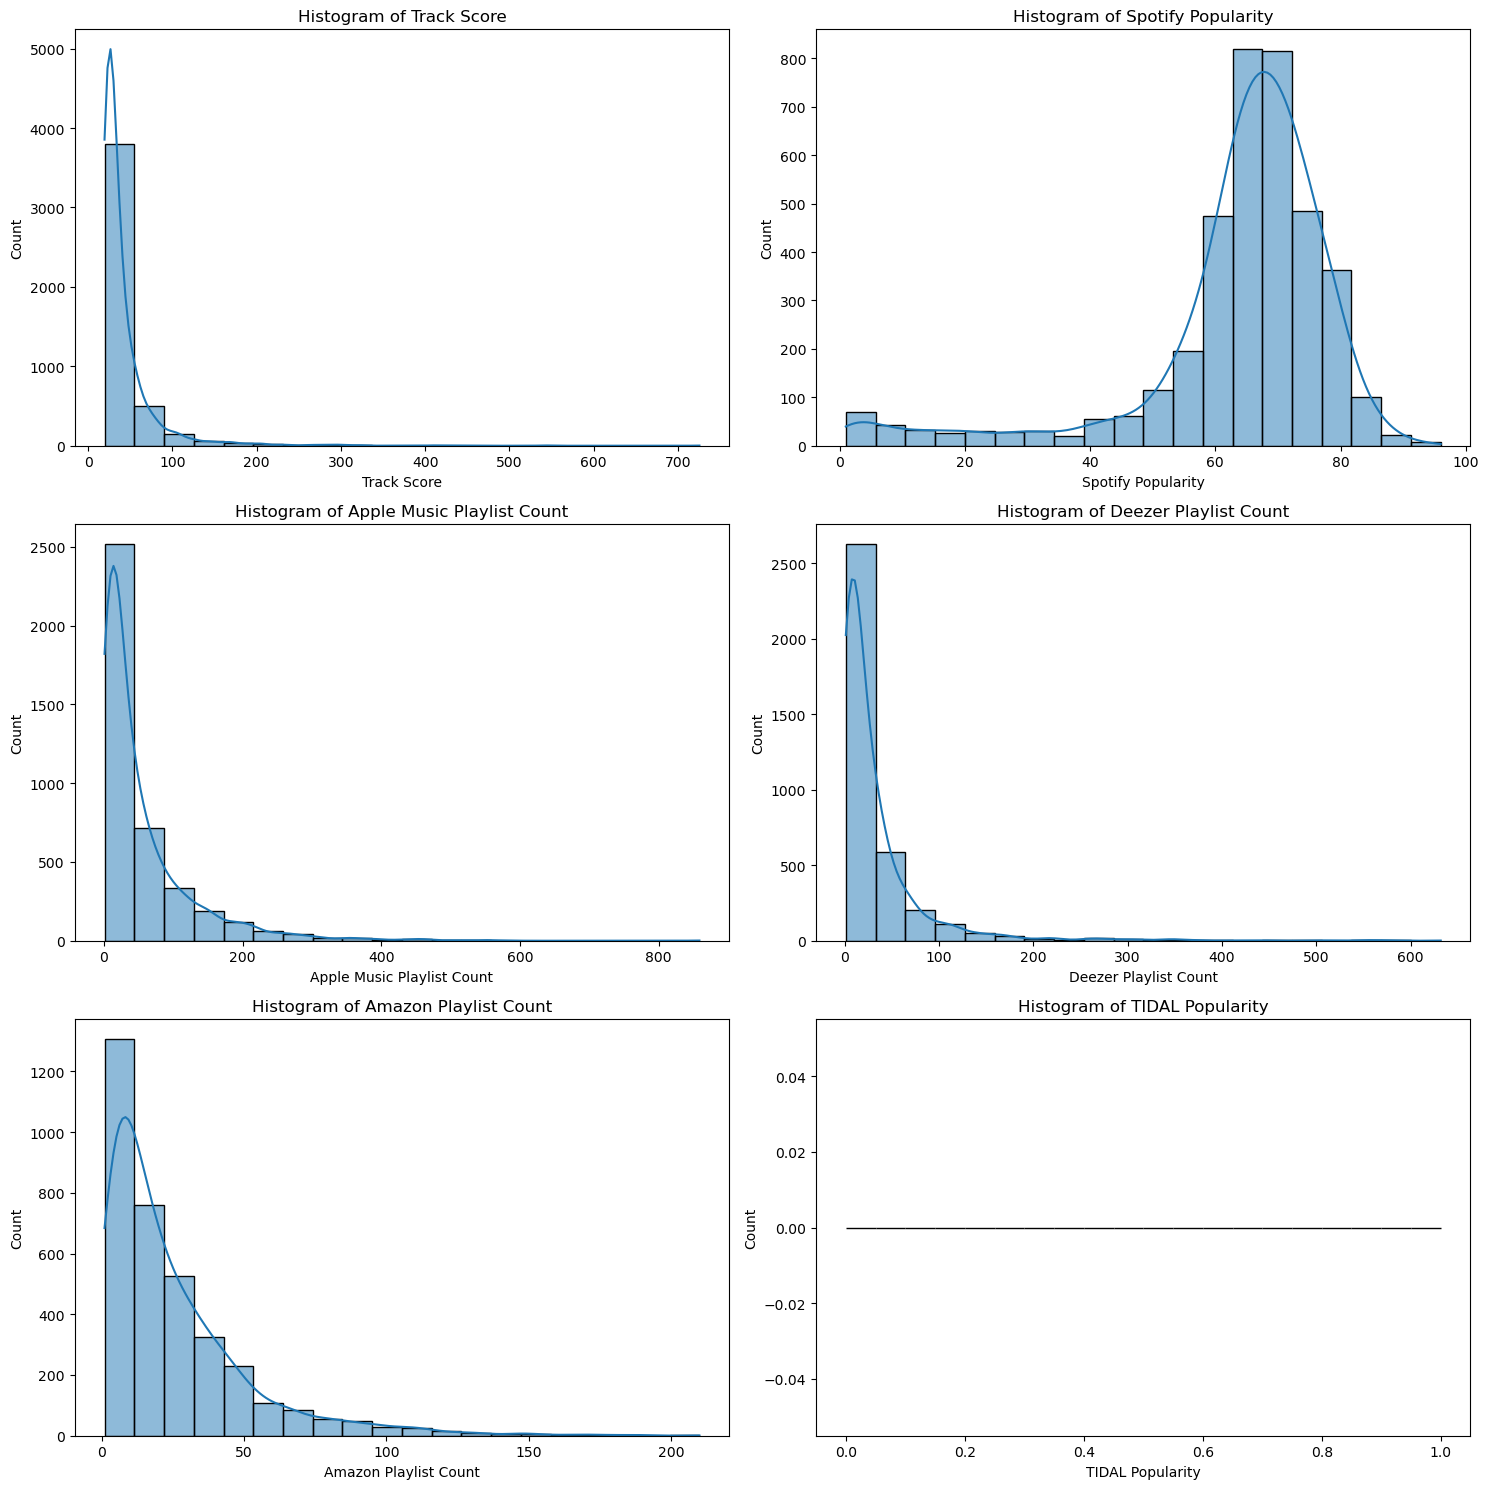

In [34]:
#Plot histograms for each of the numerical variables and calculate descriptive statistics.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(['Track Score', 'Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'TIDAL Popularity']):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()






In [77]:
#Descriptive Statistics: Calculate the mean, mode, spread, and tails (skewness and kurtosis) for each variable.

# Identify columns with all NaN values
all_nan_columns = df.columns[df.isna().all()].tolist()

# Drop columns with all NaN values if needed
df = df.drop(columns=all_nan_columns)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])
# Fill missing values for numeric columns
df_filled = numeric_df.fillna(numeric_df.mean())
from scipy.stats import skew, kurtosis
# Initialize dictionary to store descriptive statistics
descriptive_stats = {}
# Iterate over each column to calculate descriptive statistics
for column in numeric_df.columns:
    try:
        # Calculate statistics
        mean = df_filled[column].mean()
        mode = df_filled[column].mode()
        mode_value = mode.iloc[0] if not mode.empty else None
        spread = df_filled[column].std()
        skewness = skew(df_filled[column].dropna())
        kurt = kurtosis(df_filled[column].dropna())

        # Store statistics in dictionary
        descriptive_stats[column] = {
            'Mean': mean,
            'Mode': mode_value,
            'Spread (Std Dev)': spread,
            'Skewness': skewness,
            'Kurtosis': kurt
        }
    except KeyError:
        descriptive_stats[column] = 'Column not found'
    except Exception as e:
        descriptive_stats[column] = str(e)

# Display descriptive statistics
descriptive_stats



{'Track Score': {'Mean': 41.84404347826101,
  'Mode': 21.7,
  'Spread (Std Dev)': 38.54376574715532,
  'Skewness': 5.686368434584364,
  'Kurtosis': 53.87462816507168},
 'Spotify Popularity': {'Mean': 63.501580611169146,
  'Mode': 63.50158061116965,
  'Spread (Std Dev)': 14.7036610951589,
  'Skewness': -2.257955847370638,
  'Kurtosis': 6.286506435872026},
 'Apple Music Playlist Count': {'Mean': 54.60311958405621,
  'Mode': 54.603119584055456,
  'Spread (Std Dev)': 67.10252951585504,
  'Skewness': 3.0810885211454995,
  'Kurtosis': 14.830274224929838},
 'Deezer Playlist Count': {'Mean': 32.31095406360473,
  'Mode': 32.31095406360424,
  'Spread (Std Dev)': 48.53670525065182,
  'Skewness': 5.358580903488518,
  'Kurtosis': 41.3533812484804},
 'Amazon Playlist Count': {'Mean': 25.348942172073333,
  'Mode': 25.348942172073343,
  'Spread (Std Dev)': 22.814897297845793,
  'Skewness': 2.4890521710106395,
  'Kurtosis': 9.32674440860418},
 'Explicit Track': {'Mean': 0.35891304347826086,
  'Mode': 0

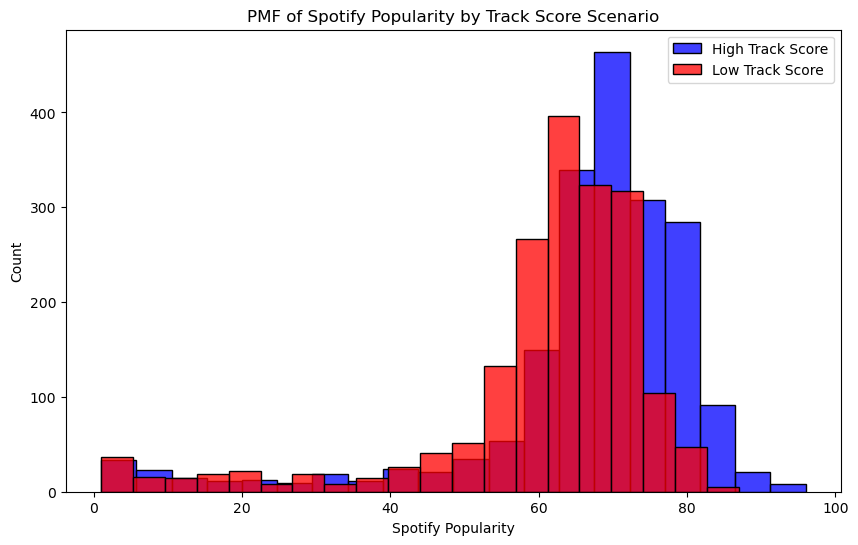

In [51]:
#Probability Mass Function (PMF): Compare two scenarios using the PMF. For instance, compare the distribution of Spotify Popularity when the Track Score is above and below its median.


# Create two scenarios based on Track Score median
median_score = df['Track Score'].median()
high_score = df[df['Track Score'] > median_score]['Spotify Popularity']
low_score = df[df['Track Score'] <= median_score]['Spotify Popularity']

# Plot PMF
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(high_score, bins=20, kde=False, label='High Track Score', color='blue', ax=ax)
sns.histplot(low_score, bins=20, kde=False, label='Low Track Score', color='red', ax=ax)
ax.set_title('PMF of Spotify Popularity by Track Score Scenario')
ax.legend()
plt.show()


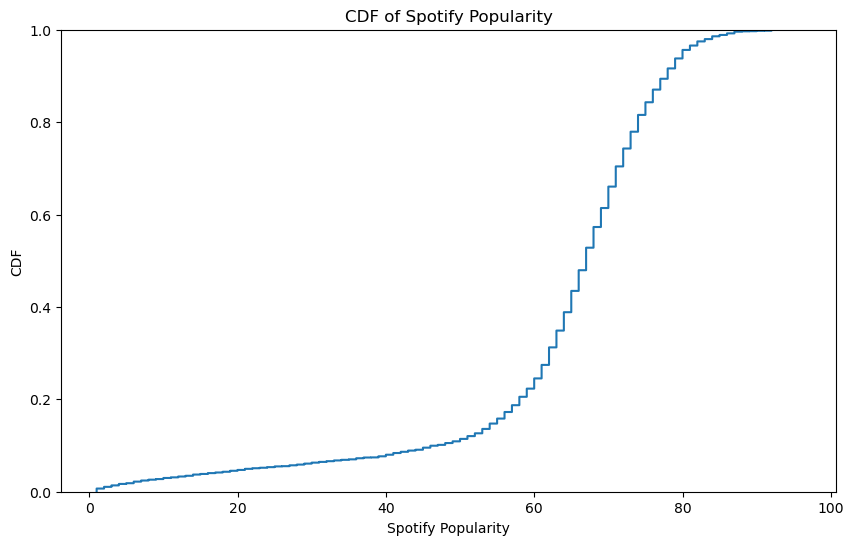

In [52]:
#Cumulative Distribution Function (CDF): Create a CDF for Spotify Popularity.

# Plot CDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['Spotify Popularity'])
plt.title('CDF of Spotify Popularity')
plt.xlabel('Spotify Popularity')
plt.ylabel('CDF')
plt.show()


Number of non-finite values: 804


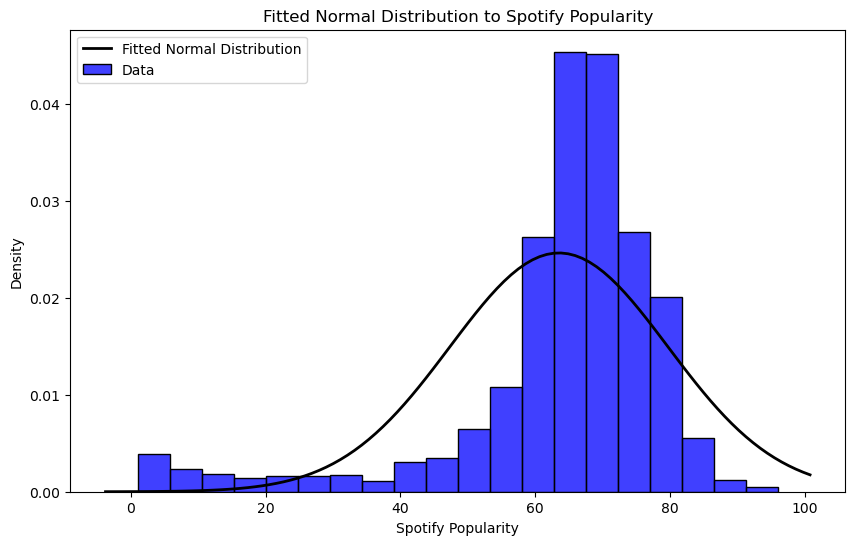

In [55]:
#Analytical Distribution: Fit a distribution (e.g., Normal) and compare it to the actual data.

# Check for non-finite values in 'Spotify Popularity'
non_finite_values = df['Spotify Popularity'].isna().sum() + np.isinf(df['Spotify Popularity']).sum()
print(f'Number of non-finite values: {non_finite_values}')

# Drop non-finite values
spotify_popularity_clean = df['Spotify Popularity'].dropna()
spotify_popularity_clean = spotify_popularity_clean[np.isfinite(spotify_popularity_clean)]

from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fit a normal distribution to the cleaned data
mu, std = norm.fit(spotify_popularity_clean)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(spotify_popularity_clean, bins=20, kde=False, label='Data', color='blue', stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.title('Fitted Normal Distribution to Spotify Popularity')
plt.xlabel('Spotify Popularity')
plt.ylabel('Density')
plt.legend()
plt.show()

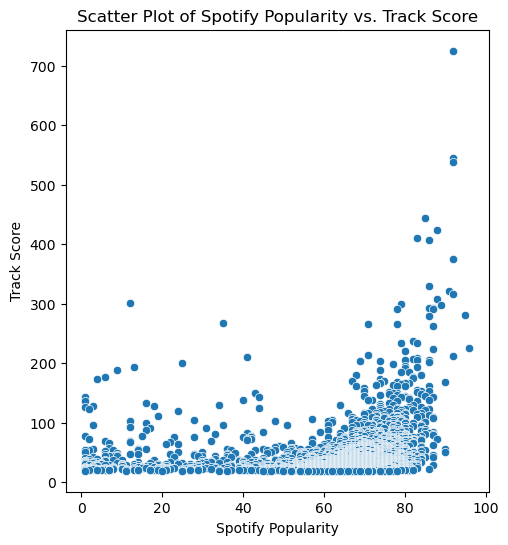

0.19280775654813445

In [74]:
#Scatter Plots and Correlation Analysis: Compare two variables with scatter plots and compute correlations.

# Scatter plot between Spotify Popularity and Track Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Spotify Popularity', y='Track Score')
plt.title('Scatter Plot of Spotify Popularity vs. Track Score')
plt.xlabel('Spotify Popularity')
plt.ylabel('Track Score')
plt.show()
# Compute correlation
correlation = df[['Spotify Popularity', 'Track Score']].corr().iloc[0, 1]
correlation


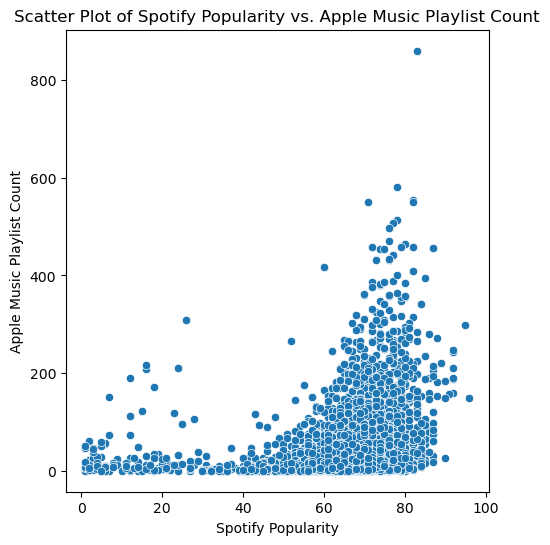

0.2884300282744505

In [75]:

# Scatter plot between Spotify Popularity and Apple Music Playlist Count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Spotify Popularity', y='Apple Music Playlist Count')
plt.title('Scatter Plot of Spotify Popularity vs. Apple Music Playlist Count')
plt.xlabel('Spotify Popularity')
plt.ylabel('Apple Music Playlist Count')
plt.show()
# Compute correlation
correlation = df[['Spotify Popularity', 'Apple Music Playlist Count']].corr().iloc[0, 1]
correlation

In [57]:
#Hypothesis Testing: Perform hypothesis test, testing if the mean Spotify Popularity differs from a known value.

from scipy.stats import ttest_1samp

# Hypothesis test: mean Spotify Popularity differs from 50
test_statistic, p_value = ttest_1samp(df['Spotify Popularity'].dropna(), 50)
test_statistic, p_value



(51.392106212822206, 0.0)

In [69]:
#Regression Analysis: Perform regression analysis to predict one variable based on others. For instance, predicting Spotify Popularity from Track Score and playlist counts.

import statsmodels.api as sm

# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with the mean of each column
df_filled = df.fillna(df.mean())

df_cleaned.replace([float('inf'), -float('inf')], np.nan, inplace=True)
df_cleaned.dropna(inplace=True)  # Remove rows with any NaN values


# Prepare data for regression with cleaned dataset
X = df_cleaned[['Track Score', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']]
X = sm.add_constant(X)  # Adds a constant term to the predictors
y = df_cleaned['Spotify Popularity']

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:     Spotify Popularity   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     29.13
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           5.05e-22
Time:                        22:49:30   Log-Likelihood:                -2111.5
No. Observations:                 565   AIC:                             4233.
Df Residuals:                     560   BIC:                             4255.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/var/folders/_7/5rzj_m210gj3m2dzm6h059zh0000gp/T/ipykernel_82955/4213857649.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled = df.fillna(df.mean())
/var/folders/_7/5rzj_m210gj3m2dzm6h059zh0000gp/T/ipykernel_82955/4213857649.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace([float('inf'), -float('inf')], np.nan, inplace=True)
/var/folders/_7/5rzj_m210gj3m2dzm6h059zh0000gp/T/ipykernel_82955/4213857649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm